In [5]:
from random import uniform
# from src.kdtree import KDTree
from collections import deque
from typing import Dict, List
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.animation as animation


# Wykorzystanie drzew KD i QuadTree do znajdywania punktów na płaszczyźnie

Wstęp <span style="color:red">TODO</span>

# Drzewo KD

## Algorytm drzewa KD
<ol>
<li>
Algorytm inicjalizuje puste drzewo z korzeniem z wartością <span style="color:cyan">NULL</span>. W kodzie realizuje to konstruktor klasy `KDTree`, gdzie korzeń (`root`) ustawiany jest na `None`.
</li>
<li>
Definiujemy funkcję rekurencyjną <span style="color:cyan">`build_tree`</span>, która odpowiada za budowę drzewa KD:
<ol>
<li>
Dla danej głębokości `depth`, ustalamy aktualny wymiar (`dimension`) na podstawie reszty z dzielenia głębokości przez liczbę wymiarów (`k`). Pozwala to na cykliczne przechodzenie przez wymiary.
</li>
<li>
Sortujemy podaną tablicę punktów według wartości w bieżącym wymiarze. Następnie wybieramy medianę jako punkt, który będzie węzłem w bieżącej iteracji.
</li>
<li>
Tworzymy nowy węzeł (`Node`) na podstawie mediany, a jego lewego i prawego potomka ustalamy rekurencyjnie, dzieląc tablicę na podtablice: 
<ul>
<li>lewa część zawiera punkty o wartościach mniejszych od mediany,</li>
<li>prawa część zawiera punkty o wartościach większych.</li>
</ul>
</li>
<li>
Rekurencja kończy się, gdy lista punktów jest pusta (`return None`) lub zawiera tylko jeden punkt (tworzymy liść drzewa).
</li>
</ol>
</li>
<li>
Drzewo jest budowane od góry (korzenia) do dołu, przechodząc przez kolejne poziomy. Proces budowy jest logarytmiczny w idealnym przypadku (dla zrównoważonego drzewa).
</li>
<li>
Dodatkowe funkcje:
<ol>
<li>
<span style="color:cyan">`add_point`</span> i <span style="color:cyan">`delete_point`</span> - są przygotowane do dodawania i usuwania punktów, jednak ich implementacja w podanym kodzie jest pusta.
</li>
<li>
<span style="color:cyan">`get_points_in_rectangle`</span> - funkcja do wyszukiwania punktów w określonym prostokącie, korzysta z rekurencji i sprawdza, czy dany węzeł znajduje się wewnątrz prostokąta.
</li>
<li>
<span style="color:cyan">`bst_to_list`</span> - zamienia całe drzewo na listę poprzez przechodzenie w porządku in-order.
</li>
</ol>
</li>
</ol>


In [ ]:
points1 = [(np.float64(0.18145161290322576), np.float64(0.2959677419354838)), (np.float64(0.6693548387096775), np.float64(0.07251082251082264)), (np.float64(-0.13306451612903225), np.float64(0.48548387096774204)), (np.float64(-0.028225806451612767), np.float64(-0.006451612903225823)), (np.float64(0.41532258064516125), np.float64(-0.09516129032258058)), (np.float64(-0.27419354838709675), np.float64(-0.0669354838709677)), (np.float64(-0.27822580645161277), np.float64(-0.07096774193548383)), (np.float64(0.153225806451613), np.float64(-0.48484848484848486)), (np.float64(0.14516129032258074), np.float64(-0.474025974025974)), (np.float64(-0.5120967741935484), np.float64(0.14826839826839833)), (np.float64(-0.5927419354838709), np.float64(-0.27922077922077926)), (np.float64(-0.3588709677419355), np.float64(-0.38203463203463206)), (np.float64(-0.4677419354838709), np.float64(-0.09112903225806446)), (np.float64(0.653225806451613), np.float64(0.04596774193548381)), (np.float64(-0.24596774193548376), np.float64(-0.3129032258064516)), (np.float64(0.3306451612903225), np.float64(-0.29004329004329)), (np.float64(0.14919354838709675), np.float64(0.2919354838709678)), (np.float64(-0.185483870967742), np.float64(-0.1114718614718615)), (np.float64(0.23790322580645173), np.float64(-0.5281385281385281)), (np.float64(0.6290322580645162), np.float64(-0.16774193548387095)), (np.float64(0.7540322580645162), np.float64(-0.1872294372294372)), (np.float64(0.7540322580645162), np.float64(-0.1872294372294372)), (np.float64(0.6935483870967742), np.float64(-0.17640692640692635)), (np.float64(0.7177419354838708), np.float64(-0.17099567099567103)), (np.float64(0.8306451612903227), np.float64(-0.1655844155844155)), (np.float64(0.8306451612903227), np.float64(-0.23051948051948057)), (np.float64(0.8306451612903227), np.float64(-0.23051948051948057)), (np.float64(0.8306451612903227), np.float64(-0.23051948051948057)), (np.float64(0.6653225806451613), np.float64(0.045454545454545414)), (np.float64(0.6733870967741935), np.float64(-0.24675324675324672)), (np.float64(0.9032258064516128), np.float64(-0.22510822510822504)), (np.float64(0.38306451612903225), np.float64(-0.4902597402597403)), (np.float64(-0.5806451612903225), np.float64(-0.4145021645021645)), (np.float64(-0.8629032258064515), np.float64(-0.48484848484848486))]
points = [(-2,3),(-1,2),(3,1),(2,2),(1,4),(1,-2),(1,2)]
tree = KDTree()
tree.build_tree(points1)

print(tree.get_points_in_rectangle((0.15,-0.6),(0.5,-0.4)))


## Wizualizacja krokowa algorytmu podziału punktów na drzwo KD

In [109]:
def plot_kdtree_splits(ax,node,depth=0,index=0,bounds=None):
    """
    Recursively plot the splitting lines of a KDTree.
    Parameters:
        ax: The matplotlib Axes object to draw on.
        node: The current Node of the KDTree.
        depth: The current depth in the tree.
        bounds: The bounding box for the current region, in the form [(xmin, xmax), (ymin, ymax)].
    """
    if node is None or node.value is None:
        return
    if bounds is None:
        # Initialize bounds as infinite in both x and y dimensions
        bounds = [(-4, 4), (-4, 4)]
        axis = depth % 2 # W are drawing on a plane, so we have to assume two dimensions
        x, y = node.value[0], node.value[1]
        if axis == 0:  # Vertical line (split by x)
            print(f"Plotting vertical {node.value} {x} {x}")
            ax.scatter(x, y, color="blue", s=5, label="Wprowadzone punkty")
            ax.plot([x, x], [bounds[1][0], bounds[1][1]], color='blue', linestyle='--', linewidth=1)
            ax.autoscale()
            plt.savefig(f"split_{index}.jpg")
            newBoundsLeft = [(bounds[0][0], x), bounds[1]]
            newBoundRight = [(x, bounds[0][1]), bounds[1]]
            plot_kdtree_splits(ax,node.left, depth + 1, 2*index+1,newBoundsLeft)
            plot_kdtree_splits(ax,node.right, depth + 1, 2*index+2,newBoundRight)
        else:  # Horizontal line (split by y)
            print(f"Plotting horizontal {node.value} {x} {x}")
            ax.scatter(x, y, color="blue", s=5, label="Wprowadzone punkty")
            ax.plot([bounds[0][0], bounds[0][1]], [y, y], color='yellow', linestyle='--', linewidth=1)
            ax.autoscale()
            plt.savefig(f"split_{index}.jpg")
            newBoundsLeft = [bounds[0], (bounds[1][0], y)]
            newBoundRight = [bounds[0], (y, bounds[1][1])]
            plot_kdtree_splits(ax,node.left, depth + 1, 2*index+1, newBoundsLeft)
            plot_kdtree_splits(ax,node.right, depth + 1, 2*index+2, newBoundRight)


def plot_kdtree_splits_bfs(ax, node, depth=0, index = 0, bounds=None,points=None,gif_name="tree_building.gif"):
    """
    Recursively plot the splitting lines of a KDTree.
    Parameters:
        ax: The matplotlib Axes object to draw on.
        node: The current Node of the KDTree.
        depth: The current depth in the tree.
        bounds: The bounding box for the current region, in the form [(xmin, xmax), (ymin, ymax)].
    """
    filenames = []
    addPoints = False
    if node is None or node.value is None:
        return
    if points is None:
        points = []
        addPoints = True
    if bounds is None:
        bounds = [(-1, 1), (-1, 1)]

    queue = deque([(node, depth, bounds, 0)])  # (node, depth, bounds, index)
    def plot_split(ax, value, bounds, index,dimension,points):
        nonlocal filenames
        x, y = value
        xBounds, yBounds = bounds
        xPoints, yPoints = zip(*points)
        ax.scatter(xPoints, yPoints, color="blue", s=5, label="Wprowadzone punkty")
        ax.plot(xBounds, yBounds, color='blue' if dimension == 0 else 'red', linestyle='--', linewidth=1)
        ax.autoscale()
        filename = f"split_{index}.jpg"
        plt.savefig(filename)
        filenames.append(filename)

    while queue:
        currentNode, currentDepth, currentBounds, currentIndex = queue.popleft()

        if currentNode is None or currentNode.value is None:
            continue
        axis = currentDepth % 2
        x, y = currentNode.value

        if axis == 0:  # Vertical line (split by x-coordinate)
            split_line = ([x, x], [currentBounds[1][0], currentBounds[1][1]])
            newBoundsLeft = [(currentBounds[0][0], x), currentBounds[1]]
            newBoundsRight = [(x, currentBounds[0][1]), currentBounds[1]]
        else:  # Horizontal line (split by y-coordinate)
            split_line = ([currentBounds[0][0], currentBounds[0][1]], [y, y])
            newBoundsLeft = [currentBounds[0], (currentBounds[1][0], y)]
            newBoundsRight = [currentBounds[0], (y, currentBounds[1][1])]
        if addPoints:
            points.append(node.value)
        # Plot the splitting line and the point
        plot_split(ax, currentNode.value, split_line, currentIndex, axis, points)

        # Enqueue child nodes with updated bounds
        queue.append((currentNode.left, currentDepth + 1, newBoundsLeft, 2 * currentIndex + 1))
        queue.append((currentNode.right, currentDepth + 1, newBoundsRight, 2 * currentIndex + 2))
        
    images = [plt.imread(fname) for fname in filenames]
    plt.figure()
    ani = animation.ArtistAnimation(plt.gcf(), [[plt.imshow(img)] for img in images], interval=500)
    ani.save(gif_name, writer='pillow')
    for fname in filenames:
        os.remove(fname)



In [ ]:
points_set = points_generator(100)
fig, ax = plt.subplots()
tree2 = KDTree()
tree2.build_tree(points_set)
min_point_x = min(points_set,key=lambda x:x[0])[0]
max_point_x = max(points_set,key=lambda x:x[0])[0]
min_point_y = min(points_set,key=lambda x:x[1])[1]
max_point_y = max(points_set,key=lambda x:x[1])[1]
offset_x = (max_point_x-min_point_x)*0.1
offset_y = (max_point_y-min_point_y)*0.1
initial_bounds = ((min_point_x-offset_x,max_point_x+offset_x),(min_point_y-offset_y,max_point_y+offset_y))
plot_kdtree_splits_bfs(ax,tree2.root, bounds=initial_bounds,points=points_set)

# QuadTree

# Porównanie i testy

## Funkcje

### Generowanie tabeli czasów CSV 

In [16]:
def csv_dump(table_name: str,data: List[Dict[str,int]],add_units=False):
    """
    Function that dumps the result of testing into a CSV file

    Args:
        table_name: Name of the file to which the result will be written
        data: An array of dictionaries that have 4 fields defined:
            > name: generator name
            > points: the amount of points generated 
            > kdtree: time of KD-Tree execution of build/query
            > quadtree: time of QuadTree execution of build/query
            > detected: points in the searched given area
    """
    
    content = "Nazwa zbioru;Ilość punktów dla zbioru; Czas obliczeń dla Drzewa KD;Czas obliczeń dla QuadTree;Punkty w obszarze\n"
    
    def wrap(number):
        return str(round(number,4)).replace('.',',')
    
    for row in data:
        value_KD = row['kdtree']
        value_Quad = row['quadtree']
        # The \\mu causes problems in excel sometimes (could as well in typst), so I will leave the macro prefix
        # unit_kdtree = ' \\mu s'
        # unit_quadtree = ' \\mu s'
        # If this causes problems in excel, delete the $ sign
        unit_kdtree = ' $mu$s'
        unit_quadtree = ' $mu$s'
        if int(value_KD) >= 1000:
            unit_kdtree = ' ms'
            value_KD /= 1000
        if int(value_Quad) >= 1000:
            unit_quadtree = ' ms'
            value_Quad /= 1000
        if int(value_KD) >= 1000:
            unit_kdtree = ' s'
            value_KD /= 1000
        if int(value_Quad) >= 1000:
            unit_quadtree = ' s'
            value_Quad /= 1000
        kdtree_time = wrap(value_KD)
        quadtree_time = wrap(value_Quad)
        content = content + f"{row['name']};{row['points']};{kdtree_time}{unit_kdtree if add_units else ''};{quadtree_time}{unit_quadtree if add_units else ''};{row['detected']}\n"
    
    output_filename = f"{table_name}.csv"
    
    with open(output_filename, "w", encoding='utf-8') as f:
        f.write(content)

    print(f"CSV data table has been written to {output_filename}")

In [17]:
csv_dump('testfile',[{'name':'test','points':2100,'kdtree':10000,'quadtree':10000000,'detected':37}])

CSV data table has been written to testfile.csv


### Generowanie punktów

In [22]:
def base_function(x):
    return 0.05*x+0.05

In [23]:
def quadratic_function(x,a=1,b=1,c=1):
    return a*x**2 + b*x + c

In [24]:
def points_generator(n, min_x = -10**3, max_x = 10**3, min_y = -10**3, max_y = 10**3):
    return [ (uniform(min_x,max_x),uniform(min_y,max_y)) for _ in range(n) ]

In [46]:
def line_generator(n, k, min_x = -10**3, max_x = 10**3, min_noise = -10, max_noise = 10, function=base_function):
    result = []
    for _ in range(n):
        x = uniform(min_x,max_x)
        noise = uniform(min_noise,max_noise)
        result.append((x,function(x)+noise))
    return result + points_generator(n = k, min_x = min_x, max_x = max_x, min_y = min(function(min_x),min_x), max_y = max(function(max_x),max_x))

#### Wizualizacja generowania punktów skupionych przy zadanej funkcji

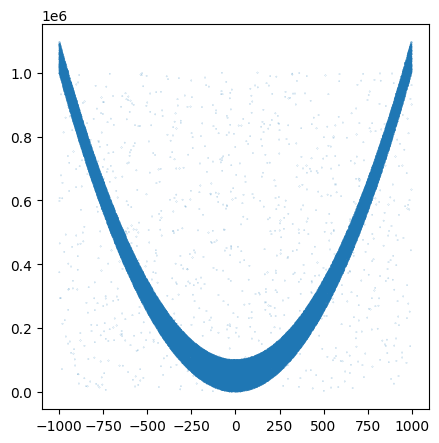

In [ ]:
N = 10**5
K = 1000
points = line_generator(N,K,max_noise=100000,function=quadratic_function)
plt.figure(figsize=(5,5))
plt.scatter(*zip(*points),s=[0.01 for _ in range(N+K)])
plt.show()

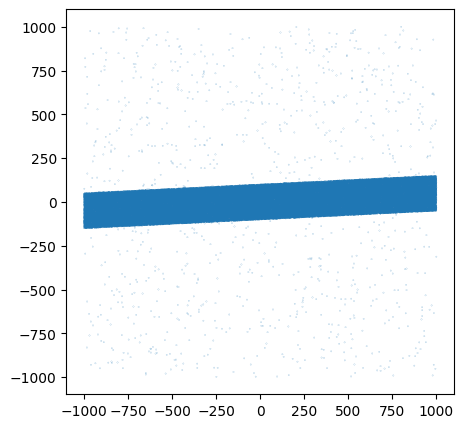

In [ ]:
N = 10**5
K = 1000
points = line_generator(N,K,min_noise=-100,max_noise=100)
plt.figure(figsize=(5,5))
plt.scatter(*zip(*points),s=[0.01 for _ in range(N+K)])
plt.show()

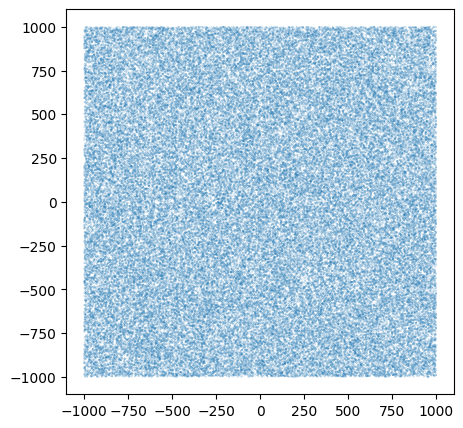

In [51]:
N = 10**5
K = 1000
points = points_generator(N)
plt.figure(figsize=(5,5))
plt.scatter(*zip(*points),s=[0.01 for _ in range(N)])
plt.show()